1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

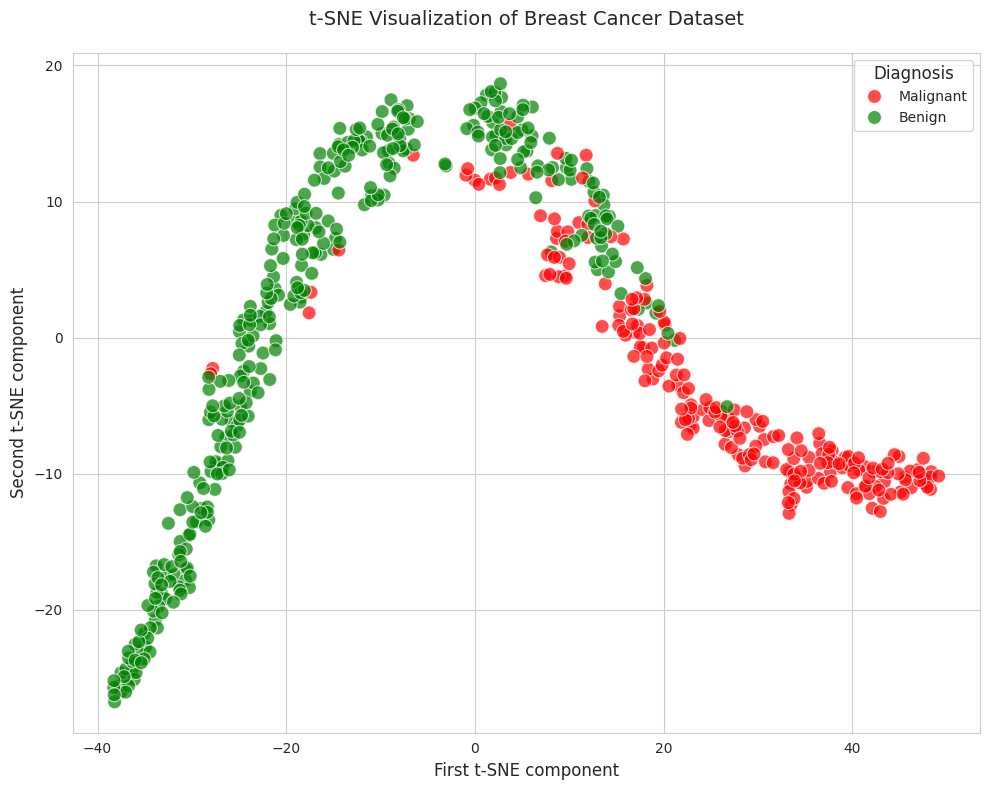

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
X = my_data.data
y = my_data.target

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for easier plotting
df_tsne = pd.DataFrame({
    'X': X_tsne[:, 0],
    'Y': X_tsne[:, 1],
    'Target': ['Malignant' if label == 0 else 'Benign' for label in y]
})

# Set up the plotting style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create the scatter plot
scatter = sns.scatterplot(
    data=df_tsne,
    x='X',
    y='Y',
    hue='Target',
    palette={'Malignant': 'red', 'Benign': 'green'},
    alpha=0.7,
    s=100
)

# Customize the plot
plt.title('t-SNE Visualization of Breast Cancer Dataset', fontsize=14, pad=20)
plt.xlabel('First t-SNE component', fontsize=12)
plt.ylabel('Second t-SNE component', fontsize=12)
plt.legend(title='Diagnosis', title_fontsize=12, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)

# Get features (X) and target (y) from my_data
X = my_data.data
y = my_data.target

# Split the data with test_size=0.2 (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42  # for reproducibility
)

# Create a simple baseline model to evaluate the split
from sklearn.dummy import DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, Y_train)
Y_pred = baseline_model.predict(X_test)

# 1. Accuracy
print("\n1. Accuracy Score:")
print(f"Split Accuracy: {accuracy_score(Y_test, Y_pred):.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\n2. Confusion Matrix:")
print("True Negatives (TN):", cm[0][0])
print("False Positives (FP):", cm[0][1])
print("False Negatives (FN):", cm[1][0])
print("True Positives (TP):", cm[1][1])

# 3. Precision
print("\n3. Precision Score:")
print(f"Split Precision: {precision_score(Y_test, Y_pred):.3f}")

# 4. Recall
print("\n4. Recall Score:")
print(f"Split Recall: {recall_score(Y_test, Y_pred):.3f}")

# 5. F1 Score
print("\n5. F1 Score:")
print(f"Split F1: {f1_score(Y_test, Y_pred):.3f}")

# Print split sizes
print("\nSplit Summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Testing labels shape: {Y_test.shape}")

# Check class distribution in both splits
print("\nClass Distribution:")
print("Training set:")
print(pd.Series(Y_train).value_counts(normalize=True))
print("\nTesting set:")
print(pd.Series(Y_test).value_counts(normalize=True))


1. Accuracy Score:
Split Accuracy: 0.623

2. Confusion Matrix:
True Negatives (TN): 0
False Positives (FP): 43
False Negatives (FN): 0
True Positives (TP): 71

3. Precision Score:
Split Precision: 0.623

4. Recall Score:
Split Recall: 1.000

5. F1 Score:
Split F1: 0.768

Split Summary:
Training set shape: (455, 30)
Testing set shape: (114, 30)
Training labels shape: (455,)
Testing labels shape: (114,)

Class Distribution:
Training set:
1    0.628571
0    0.371429
Name: proportion, dtype: float64

Testing set:
1    0.622807
0    0.377193
Name: proportion, dtype: float64


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)

# First, let's create and evaluate a default model as baseline
model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train, Y_train)
Y_pred_default = model_default.predict(X_test)

print("Default Decision Tree Results:")
print("-" * 50)
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_default):.3f}")

cm_default = confusion_matrix(Y_test, Y_pred_default)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_default[0][0]}")
print(f"False Positives: {cm_default[0][1]}")
print(f"False Negatives: {cm_default[1][0]}")
print(f"True Positives: {cm_default[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_default):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_default):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_default):.3f}")

# Now let's try different parameters to optimize the model
parameters_to_try = [
    {
        'max_depth': 3,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'criterion': 'gini'
    },
    {
        'max_depth': 5,
        'min_samples_split': 10,
        'min_samples_leaf': 4,
        'criterion': 'entropy'
    },
    {
        'max_depth': 8,
        'min_samples_split': 8,
        'min_samples_leaf': 3,
        'criterion': 'gini'
    }
]

best_f1 = 0
best_params = None

# Test each parameter combination
for params in parameters_to_try:
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    current_f1 = f1_score(Y_test, Y_pred)

    print(f"\nParameters tested: {params}")
    print(f"1. Accuracy: {accuracy_score(Y_test, Y_pred):.3f}")

    cm = confusion_matrix(Y_test, Y_pred)
    print("2. Confusion Matrix:")
    print(f"TN: {cm[0][0]}, FP: {cm[0][1]}")
    print(f"FN: {cm[1][0]}, TP: {cm[1][1]}")

    print(f"3. Precision: {precision_score(Y_test, Y_pred):.3f}")
    print(f"4. Recall: {recall_score(Y_test, Y_pred):.3f}")
    print(f"5. F1 Score: {current_f1:.3f}")

    if current_f1 > best_f1:
        best_f1 = current_f1
        best_params = params

# Train final model with best parameters
model_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
model_decision_tree.fit(X_train, Y_train)
Y_pred_final = model_decision_tree.predict(X_test)

print("\nFinal Optimized Decision Tree Results:")
print("-" * 50)
print(f"Best Parameters: {best_params}")
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_final):.3f}")

cm_final = confusion_matrix(Y_test, Y_pred_final)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_final[0][0]}")
print(f"False Positives: {cm_final[0][1]}")
print(f"False Negatives: {cm_final[1][0]}")
print(f"True Positives: {cm_final[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_final):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_final):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_final):.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': my_data.feature_names,
    'importance': model_decision_tree.feature_importances_
})
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())

Default Decision Tree Results:
--------------------------------------------------

1. Accuracy Score: 0.947

2. Confusion Matrix:
True Negatives: 40
False Positives: 3
False Negatives: 3
True Positives: 68

3. Precision Score: 0.958

4. Recall Score: 0.958

5. F1 Score: 0.958

Parameters tested: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'}
1. Accuracy: 0.947
2. Confusion Matrix:
TN: 39, FP: 4
FN: 2, TP: 69
3. Precision: 0.945
4. Recall: 0.972
5. F1 Score: 0.958

Parameters tested: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'entropy'}
1. Accuracy: 0.974
2. Confusion Matrix:
TN: 40, FP: 3
FN: 0, TP: 71
3. Precision: 0.959
4. Recall: 1.000
5. F1 Score: 0.979

Parameters tested: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'gini'}
1. Accuracy: 0.947
2. Confusion Matrix:
TN: 39, FP: 4
FN: 2, TP: 69
3. Precision: 0.945
4. Recall: 0.972
5. F1 Score: 0.958

Final Optimized Decision Tree R

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)

# First create and evaluate a default model as baseline
model_default = RandomForestClassifier(random_state=42)
model_default.fit(X_train, Y_train)
Y_pred_default = model_default.predict(X_test)

print("Default Random Forest Results:")
print("-" * 50)
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_default):.3f}")

cm_default = confusion_matrix(Y_test, Y_pred_default)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_default[0][0]}")
print(f"False Positives: {cm_default[0][1]}")
print(f"False Negatives: {cm_default[1][0]}")
print(f"True Positives: {cm_default[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_default):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_default):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_default):.3f}")

# Try different parameters to optimize the model
parameters_to_try = [
   {
       'n_estimators': 100,
       'max_depth': 10,
       'min_samples_split': 5,
       'min_samples_leaf': 2,
       'criterion': 'gini'
   },
   {
       'n_estimators': 200,
       'max_depth': 15,
       'min_samples_split': 8,
       'min_samples_leaf': 3,
       'criterion': 'entropy'
   },
   {
       'n_estimators': 150,
       'max_depth': None,
       'min_samples_split': 10,
       'min_samples_leaf': 4,
       'criterion': 'gini'
   }
]

best_f1 = 0
best_params = None

# Test each parameter combination
for params in parameters_to_try:
   model = RandomForestClassifier(**params, random_state=42)
   model.fit(X_train, Y_train)
   Y_pred = model.predict(X_test)

   current_f1 = f1_score(Y_test, Y_pred)

   print(f"\nParameters tested: {params}")
   print(f"1. Accuracy: {accuracy_score(Y_test, Y_pred):.3f}")

   cm = confusion_matrix(Y_test, Y_pred)
   print("2. Confusion Matrix:")
   print(f"TN: {cm[0][0]}, FP: {cm[0][1]}")
   print(f"FN: {cm[1][0]}, TP: {cm[1][1]}")

   print(f"3. Precision: {precision_score(Y_test, Y_pred):.3f}")
   print(f"4. Recall: {recall_score(Y_test, Y_pred):.3f}")
   print(f"5. F1 Score: {current_f1:.3f}")

   if current_f1 > best_f1:
       best_f1 = current_f1
       best_params = params

# Train final model with best parameters
model_random_forest = RandomForestClassifier(**best_params, random_state=42)
model_random_forest.fit(X_train, Y_train)
Y_pred_final = model_random_forest.predict(X_test)

print("\nFinal Optimized Random Forest Results:")
print("-" * 50)
print(f"Best Parameters: {best_params}")
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_final):.3f}")

cm_final = confusion_matrix(Y_test, Y_pred_final)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_final[0][0]}")
print(f"False Positives: {cm_final[0][1]}")
print(f"False Negatives: {cm_final[1][0]}")
print(f"True Positives: {cm_final[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_final):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_final):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_final):.3f}")

# Feature importance
feature_importance = pd.DataFrame({
   'feature': my_data.feature_names,
   'importance': model_random_forest.feature_importances_
})
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())

Default Random Forest Results:
--------------------------------------------------

1. Accuracy Score: 0.965

2. Confusion Matrix:
True Negatives: 40
False Positives: 3
False Negatives: 1
True Positives: 70

3. Precision Score: 0.959

4. Recall Score: 0.986

5. F1 Score: 0.972

Parameters tested: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini'}
1. Accuracy: 0.965
2. Confusion Matrix:
TN: 40, FP: 3
FN: 1, TP: 70
3. Precision: 0.959
4. Recall: 0.986
5. F1 Score: 0.972

Parameters tested: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3, 'criterion': 'entropy'}
1. Accuracy: 0.965
2. Confusion Matrix:
TN: 40, FP: 3
FN: 1, TP: 70
3. Precision: 0.959
4. Recall: 0.986
5. F1 Score: 0.972

Parameters tested: {'n_estimators': 150, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4, 'criterion': 'gini'}
1. Accuracy: 0.965
2. Confusion Matrix:
TN: 40, FP: 3
FN: 1, TP: 70
3. Precision: 0.959


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)

# First create and evaluate a default model as baseline
model_default = AdaBoostClassifier(random_state=42)
model_default.fit(X_train, Y_train)
Y_pred_default = model_default.predict(X_test)

print("Default AdaBoost Results:")
print("-" * 50)
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_default):.3f}")

cm_default = confusion_matrix(Y_test, Y_pred_default)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_default[0][0]}")
print(f"False Positives: {cm_default[0][1]}")
print(f"False Negatives: {cm_default[1][0]}")
print(f"True Positives: {cm_default[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_default):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_default):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_default):.3f}")

# Try different parameters to optimize the model
parameters_to_try = [
   {
       'n_estimators': 50,
       'learning_rate': 1.0,
       'algorithm': 'SAMME.R'
   },
   {
       'n_estimators': 100,
       'learning_rate': 0.5,
       'algorithm': 'SAMME.R'
   },
   {
       'n_estimators': 200,
       'learning_rate': 0.1,
       'algorithm': 'SAMME.R'
   }
]

best_f1 = 0
best_params = None

# Test each parameter combination
for params in parameters_to_try:
   model = AdaBoostClassifier(**params, random_state=42)
   model.fit(X_train, Y_train)
   Y_pred = model.predict(X_test)

   current_f1 = f1_score(Y_test, Y_pred)

   print(f"\nParameters tested: {params}")
   print(f"1. Accuracy: {accuracy_score(Y_test, Y_pred):.3f}")

   cm = confusion_matrix(Y_test, Y_pred)
   print("2. Confusion Matrix:")
   print(f"TN: {cm[0][0]}, FP: {cm[0][1]}")
   print(f"FN: {cm[1][0]}, TP: {cm[1][1]}")

   print(f"3. Precision: {precision_score(Y_test, Y_pred):.3f}")
   print(f"4. Recall: {recall_score(Y_test, Y_pred):.3f}")
   print(f"5. F1 Score: {current_f1:.3f}")

   if current_f1 > best_f1:
       best_f1 = current_f1
       best_params = params

# Train final model with best parameters
model_adaboost = AdaBoostClassifier(**best_params, random_state=42)
model_adaboost.fit(X_train, Y_train)
Y_pred_final = model_adaboost.predict(X_test)

print("\nFinal Optimized AdaBoost Results:")
print("-" * 50)
print(f"Best Parameters: {best_params}")
print(f"\n1. Accuracy Score: {accuracy_score(Y_test, Y_pred_final):.3f}")

cm_final = confusion_matrix(Y_test, Y_pred_final)
print("\n2. Confusion Matrix:")
print(f"True Negatives: {cm_final[0][0]}")
print(f"False Positives: {cm_final[0][1]}")
print(f"False Negatives: {cm_final[1][0]}")
print(f"True Positives: {cm_final[1][1]}")

print(f"\n3. Precision Score: {precision_score(Y_test, Y_pred_final):.3f}")
print(f"\n4. Recall Score: {recall_score(Y_test, Y_pred_final):.3f}")
print(f"\n5. F1 Score: {f1_score(Y_test, Y_pred_final):.3f}")

# Feature importance
feature_importance = pd.DataFrame({
   'feature': my_data.feature_names,
   'importance': model_adaboost.feature_importances_
})
print("\nTop 5 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Default AdaBoost Results:
--------------------------------------------------

1. Accuracy Score: 0.974

2. Confusion Matrix:
True Negatives: 41
False Positives: 2
False Negatives: 1
True Positives: 70

3. Precision Score: 0.972

4. Recall Score: 0.986

5. F1 Score: 0.979


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Parameters tested: {'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
1. Accuracy: 0.974
2. Confusion Matrix:
TN: 41, FP: 2
FN: 1, TP: 70
3. Precision: 0.972
4. Recall: 0.986
5. F1 Score: 0.979


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Parameters tested: {'n_estimators': 100, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
1. Accuracy: 0.974
2. Confusion Matrix:
TN: 41, FP: 2
FN: 1, TP: 70
3. Precision: 0.972
4. Recall: 0.986
5. F1 Score: 0.979


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Parameters tested: {'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
1. Accuracy: 0.965
2. Confusion Matrix:
TN: 40, FP: 3
FN: 1, TP: 70
3. Precision: 0.959
4. Recall: 0.986
5. F1 Score: 0.972


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Final Optimized AdaBoost Results:
--------------------------------------------------
Best Parameters: {'n_estimators': 50, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}

1. Accuracy Score: 0.974

2. Confusion Matrix:
True Negatives: 41
False Positives: 2
False Negatives: 1
True Positives: 70

3. Precision Score: 0.972

4. Recall Score: 0.986

5. F1 Score: 0.979

Top 5 Most Important Features:
              feature  importance
23         worst area        0.10
24   worst smoothness        0.08
21      worst texture        0.08
15  compactness error        0.06
28     worst symmetry        0.06


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#
# Function to evaluate classifiers using all 5 metrics
def evaluate_classifier(name, model, X_test, Y_test):
   Y_pred = model.predict(X_test)

   print(f"\n{'-'*50}")
   print(f"{name} Evaluation:")
   print(f"{'-'*50}")

   # 1. Accuracy
   accuracy = accuracy_score(Y_test, Y_pred)
   print(f"\n1. Accuracy Score: {accuracy:.3f}")

   # 2. Confusion Matrix
   cm = confusion_matrix(Y_test, Y_pred)
   print("\n2. Confusion Matrix:")
   print(f"True Negatives: {cm[0][0]}")
   print(f"False Positives: {cm[0][1]}")
   print(f"False Negatives: {cm[1][0]}")
   print(f"True Positives: {cm[1][1]}")

   # 3. Precision
   precision = precision_score(Y_test, Y_pred)
   print(f"\n3. Precision Score: {precision:.3f}")

   # 4. Recall
   recall = recall_score(Y_test, Y_pred)
   print(f"\n4. Recall Score: {recall:.3f}")

   # 5. F1 Score
   f1 = f1_score(Y_test, Y_pred)
   print(f"\n5. F1 Score: {f1:.3f}")

   return {
       'Model': name,
       'Accuracy': accuracy,
       'Precision': precision,
       'Recall': recall,
       'F1 Score': f1,
       'Confusion Matrix': cm
   }

# Evaluate each classifier
results_dt = evaluate_classifier("Decision Tree", model_decision_tree, X_test, Y_test)
results_rf = evaluate_classifier("Random Forest", model_random_forest, X_test, Y_test)
results_ada = evaluate_classifier("AdaBoost", model_adaboost, X_test, Y_test)

# Create comparison DataFrame
results_df = pd.DataFrame([
   results_dt,
   results_rf,
   results_ada
])[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']]

print("\nModel Comparison:")
print("-" * 50)
print(results_df)

# Choose F1 Score as the decisive metric for medical diagnosis
decisive_metric = 'F1 Score'
winner = results_df.loc[results_df[decisive_metric].idxmax()]

print(f"\nBest Model Based on {decisive_metric}:")
print(f"Winner: {winner['Model']}")
print(f"F1 Score: {winner[decisive_metric]:.3f}")

# Compare all metrics for the winner
print(f"\nDetailed Metrics for Winning Model ({winner['Model']}):")
print(f"Accuracy: {winner['Accuracy']:.3f}")
print(f"Precision: {winner['Precision']:.3f}")
print(f"Recall: {winner['Recall']:.3f}")
print(f"F1 Score: {winner['F1 Score']:.3f}")

# Explanation
print("\nWhy F1 Score was chosen as the decisive metric:")
print("1. Balances Precision and Recall")
print("2. Critical for medical diagnosis where both false positives and false negatives are important")
print("3. More informative than accuracy for imbalanced classes")
print("4. Provides a single score that considers both Type I and Type II errors")

print("\nModel Ranking by F1 Score:")
ranked_models = results_df.sort_values('F1 Score', ascending=False)
for idx, model in ranked_models.iterrows():
   print(f"{model['Model']}: {model['F1 Score']:.3f}")


--------------------------------------------------
Decision Tree Evaluation:
--------------------------------------------------

1. Accuracy Score: 0.974

2. Confusion Matrix:
True Negatives: 40
False Positives: 3
False Negatives: 0
True Positives: 71

3. Precision Score: 0.959

4. Recall Score: 1.000

5. F1 Score: 0.979

--------------------------------------------------
Random Forest Evaluation:
--------------------------------------------------

1. Accuracy Score: 0.965

2. Confusion Matrix:
True Negatives: 40
False Positives: 3
False Negatives: 1
True Positives: 70

3. Precision Score: 0.959

4. Recall Score: 0.986

5. F1 Score: 0.972

--------------------------------------------------
AdaBoost Evaluation:
--------------------------------------------------

1. Accuracy Score: 0.974

2. Confusion Matrix:
True Negatives: 41
False Positives: 2
False Negatives: 1
True Positives: 70

3. Precision Score: 0.972

4. Recall Score: 0.986

5. F1 Score: 0.979

Model Comparison:
--------------